# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [1]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 10
page_size = 100

reviews = []

# for i in range(1, pages + 1):
for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')
    for para in parsed_content.find_all("div", {"class": "text_content"}):
        reviews.append(para.get_text())
    
    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews


In [3]:
df = pd.DataFrame()
df["reviews"] = reviews
df.head()

,reviews
0,Not Verified | Extremely rude ground service....
1,✅ Trip Verified | My son and I flew to Geneva...
2,✅ Trip Verified | For the price paid (bought ...
3,✅ Trip Verified | Flight left on time and arr...
4,✅ Trip Verified | Very Poor Business class pr...


In [4]:
df.to_csv("data/BA_reviews.csv")

Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

In [5]:
df.columns

Index(['reviews'], dtype='object')

In [6]:
df.dtypes

reviews    object
dtype: object

In [7]:
df.isnull().sum()

reviews    0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 1 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   reviews  1000 non-null   object
dtypes: object(1)
memory usage: 7.9+ KB


In [10]:
print("Target variable contains :")
df['reviews'].value_counts()

Target variable contains :


Not Verified |  Extremely rude ground service. We were non-rev flying and London was our connection/layover. Gate agent was extremely rude and forced me to check my carry on suitcase with the explanation that it was “oversized.” However, when I put it in the sizer, it fit perfectly without force. The plane was not fully booked and had lots of room overhead. The gate agent was insistent and rushed us with no regard for the fact that we would have to redo security in order to get our bags again, as we were switching airlines and needed to carry them on due to our non-rev status. The flight itself was good, attendants were polite and helpful. No complains there. Just extremely unhappy with the gate agent service. I understand that it is not a pleasant job and frankly I would not be overjoyed to work there either but that does not explain why we had to be inconvenienced with no fair explanation or attention.    1
Not Verified |  London to Johannesburg. Departure was slightly delayed by 50 

## Cleaning the Dataset

### Removing unnecessary text

In [11]:
new_df= df['reviews'].replace({"✅ Trip Verified |": '', "Not Verified |": ''}, regex=True)
print(new_df)

0      |  Extremely rude ground service. We were non-...
1      |  My son and I flew to Geneva last Sunday for...
2      |  For the price paid (bought during a sale) i...
3      |  Flight left on time and arrived over half a...
4      |  Very Poor Business class product, BA is not...
                             ...                        
995    |  I booked a British Airways flight from Amst...
996    |  Flying premium economy on British Airways f...
997    |  Tokyo to London. I was looking forward to t...
998    |  London to Tokyo Haneda. My wife and I treat...
999    |  I was flying London to Billund today via Br...
Name: reviews, Length: 1000, dtype: object


In [12]:
#series to dataframe
import pandas as pd

df1 = new_df.to_frame(name='reviews')
print(df1)

                                               reviews
0    |  Extremely rude ground service. We were non-...
1    |  My son and I flew to Geneva last Sunday for...
2    |  For the price paid (bought during a sale) i...
3    |  Flight left on time and arrived over half a...
4    |  Very Poor Business class product, BA is not...
..                                                 ...
995  |  I booked a British Airways flight from Amst...
996  |  Flying premium economy on British Airways f...
997  |  Tokyo to London. I was looking forward to t...
998  |  London to Tokyo Haneda. My wife and I treat...
999  |  I was flying London to Billund today via Br...

[1000 rows x 1 columns]


In [13]:
df1.head()

,reviews
0,| Extremely rude ground service. We were non-...
1,| My son and I flew to Geneva last Sunday for...
2,| For the price paid (bought during a sale) i...
3,| Flight left on time and arrived over half a...
4,"| Very Poor Business class product, BA is not..."


In [14]:
df1.tail()

,reviews
995,| I booked a British Airways flight from Amst...
996,| Flying premium economy on British Airways f...
997,| Tokyo to London. I was looking forward to t...
998,| London to Tokyo Haneda. My wife and I treat...
999,| I was flying London to Billund today via Br...


### Removing Stopwords

In [15]:
import nltk
from nltk.corpus import stopwords

# Download NLTK stop words data
nltk.download('stopwords')

# Get the English stop words
stop_words = set(stopwords.words('english'))

# Assuming 'new_df' is your DataFrame with a 'reviews' column
df1['reviews'] = df1['reviews'].apply(lambda x: ' '.join([word for word in x.split() if word.lower() not in stop_words]))

# Print the DataFrame after stop words removal
print(df1)

                                               reviews
0    | Extremely rude ground service. non-rev flyin...
1    | son flew Geneva last Sunday skiing holiday L...
2    | price paid (bought sale) decent experience a...
3    | Flight left time arrived half hour earlier s...
4    | Poor Business class product, BA even close a...
..                                                 ...
995  | booked British Airways flight Amsterdam Lond...
996  | Flying premium economy British Airways New O...
997  | Tokyo London. looking forward flight Club Wo...
998  | London Tokyo Haneda. wife treated first clas...
999  | flying London Billund today via British Airw...

[1000 rows x 1 columns]


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Lenovo\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


### Removing Punctuations

In [16]:
import string

reviews_series = df1['reviews']

# Define a function to remove punctuation
def remove_punctuation(text):
    return text.translate(str.maketrans("", "", string.punctuation))

# Apply the function to the 'reviews' column
df1['reviews'] = reviews_series.apply(remove_punctuation)

# Display the cleaned DataFrame
print(df1)

                                               reviews
0     Extremely rude ground service nonrev flying L...
1     son flew Geneva last Sunday skiing holiday Le...
2     price paid bought sale decent experience alth...
3     Flight left time arrived half hour earlier sc...
4     Poor Business class product BA even close air...
..                                                 ...
995   booked British Airways flight Amsterdam Londo...
996   Flying premium economy British Airways New Or...
997   Tokyo London looking forward flight Club Worl...
998   London Tokyo Haneda wife treated first class ...
999   flying London Billund today via British Airwa...

[1000 rows x 1 columns]


### Removing Contractions

In [17]:
import contractions

# Assuming 'new_df' is your DataFrame with a 'reviews' column
reviews_series = df1['reviews']

# Define a function to expand contractions
def expand_contractions(text):
    return contractions.fix(text)

# Apply the function to the 'reviews' column
df1['reviews'] = reviews_series.apply(expand_contractions)

# Display the DataFrame with expanded contractions
print(df1)

                                               reviews
0     Extremely rude ground service nonrev flying L...
1     son flew Geneva last Sunday skiing holiday Le...
2     price paid bought sale decent experience alth...
3     Flight left time arrived half hour earlier sc...
4     Poor Business class product BA even close air...
..                                                 ...
995   booked British Airways flight Amsterdam Londo...
996   Flying premium economy British Airways New Or...
997   Tokyo London looking forward flight Club Worl...
998   London Tokyo Haneda wife treated first class ...
999   flying London Billund today via British Airwa...

[1000 rows x 1 columns]


### Lemmitization

In [18]:
from nltk.stem import WordNetLemmatizer

# Lemmatization
lemmatizer = WordNetLemmatizer()
df1['lemmatized_reviews'] = df1['reviews'].apply(lambda x: ' '.join([lemmatizer.lemmatize(word) for word in x.split()]))
print(df1)

                                               reviews  \
0     Extremely rude ground service nonrev flying L...   
1     son flew Geneva last Sunday skiing holiday Le...   
2     price paid bought sale decent experience alth...   
3     Flight left time arrived half hour earlier sc...   
4     Poor Business class product BA even close air...   
..                                                 ...   
995   booked British Airways flight Amsterdam Londo...   
996   Flying premium economy British Airways New Or...   
997   Tokyo London looking forward flight Club Worl...   
998   London Tokyo Haneda wife treated first class ...   
999   flying London Billund today via British Airwa...   

                                    lemmatized_reviews  
0    Extremely rude ground service nonrev flying Lo...  
1    son flew Geneva last Sunday skiing holiday Les...  
2    price paid bought sale decent experience altho...  
3    Flight left time arrived half hour earlier sch...  
4    Poor Business

### Sentiment Analysis

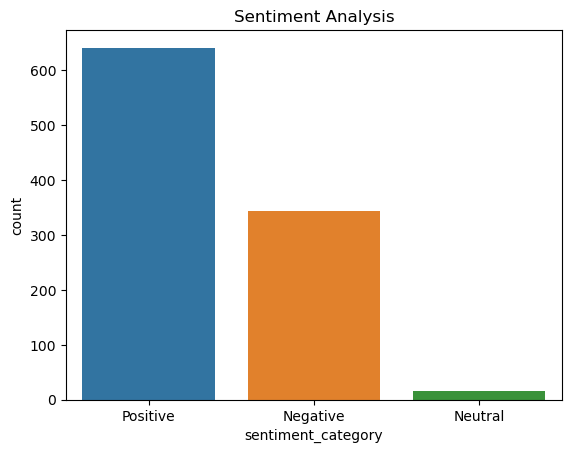

In [19]:
from textblob import TextBlob
import matplotlib.pyplot as plt
import seaborn as sns

df1['sentiment'] = df1['lemmatized_reviews'].apply(lambda x: TextBlob(str(x)).sentiment.polarity)
df1['sentiment_category'] = df1['sentiment'].apply(lambda x: 'Positive' if x > 0 else 'Negative' if x < 0 else 'Neutral')

sns.countplot(x='sentiment_category', data=df1)
plt.title('Sentiment Analysis')
plt.show()

In [23]:
df1.head()

,reviews,lemmatized_reviews,sentiment,sentiment_category
0,Extremely rude ground service nonrev flying L...,Extremely rude ground service nonrev flying Lo...,0.191667,Positive
1,son flew Geneva last Sunday skiing holiday Le...,son flew Geneva last Sunday skiing holiday Les...,-0.059580,Negative
2,price paid bought sale decent experience alth...,price paid bought sale decent experience altho...,0.141071,Positive
3,Flight left time arrived half hour earlier sc...,Flight left time arrived half hour earlier sch...,-0.013846,Negative
4,Poor Business class product BA even close air...,Poor Business class product BA even close airl...,0.046753,Positive


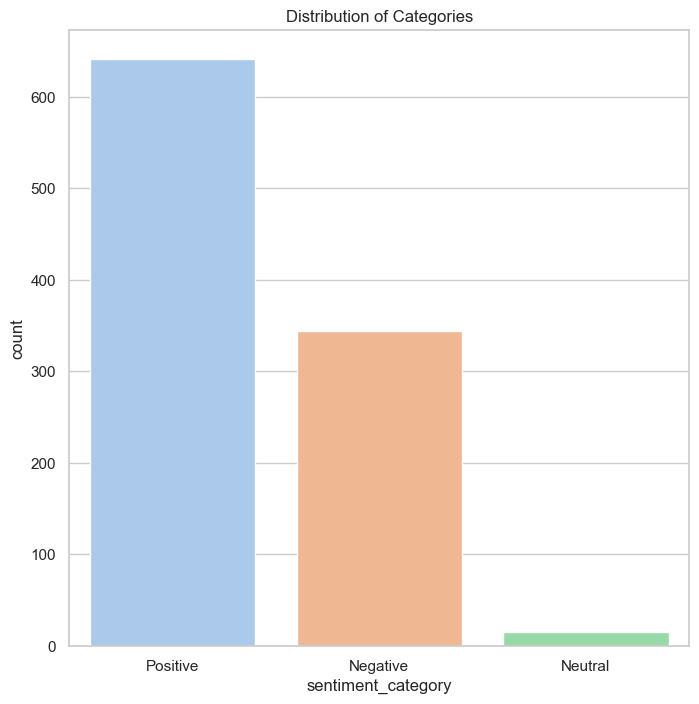

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Count the occurrences of each category
category_counts = df1['sentiment_category'].value_counts()

# Create a pie chart using seaborn
plt.figure(figsize=(8, 8))
sns.set(style="whitegrid")
sns.countplot(x='sentiment_category', data=df1, palette="pastel", order=category_counts.index)
plt.title('Distribution of Categories')

# Show the plot
plt.show()

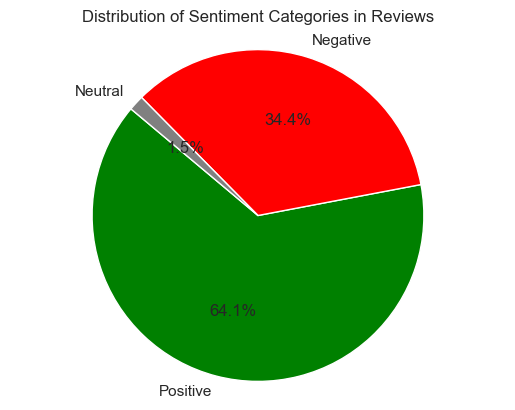

In [21]:
# Count the occurrences of each sentiment category
sentiment_counts = df1['sentiment_category'].value_counts().to_dict()

# Data for the pie chart
sentiment_labels = list(sentiment_counts.keys())
count_values = list(sentiment_counts.values())

# Plot
plt.pie(count_values, labels=sentiment_labels, autopct='%1.1f%%', startangle=140, colors=['green', 'red', 'gray'])
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

# Title
plt.title('Distribution of Sentiment Categories in Reviews')

# Show the plot
plt.show()

In [25]:
pip install matplotlib wordcloud

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: matplotlib in c:\users\lenovo\anaconda3\lib\site-packages (3.5.2)



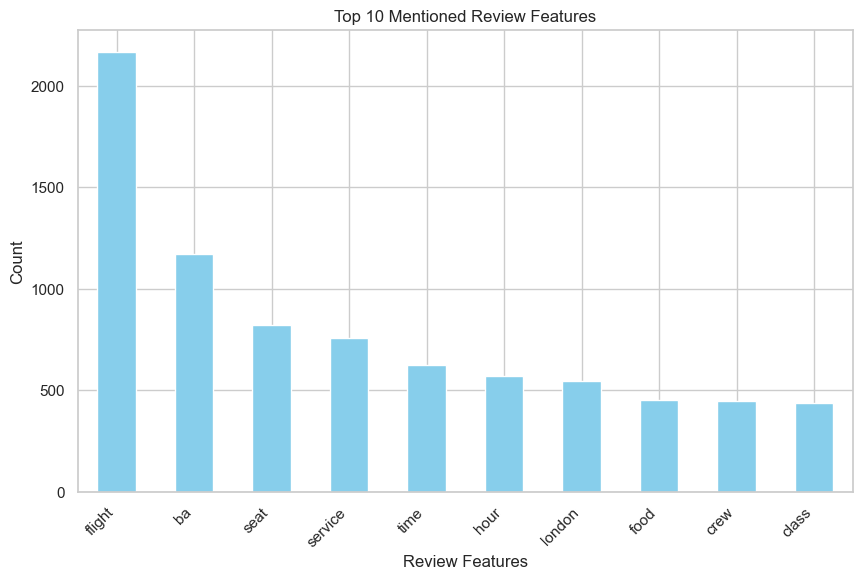

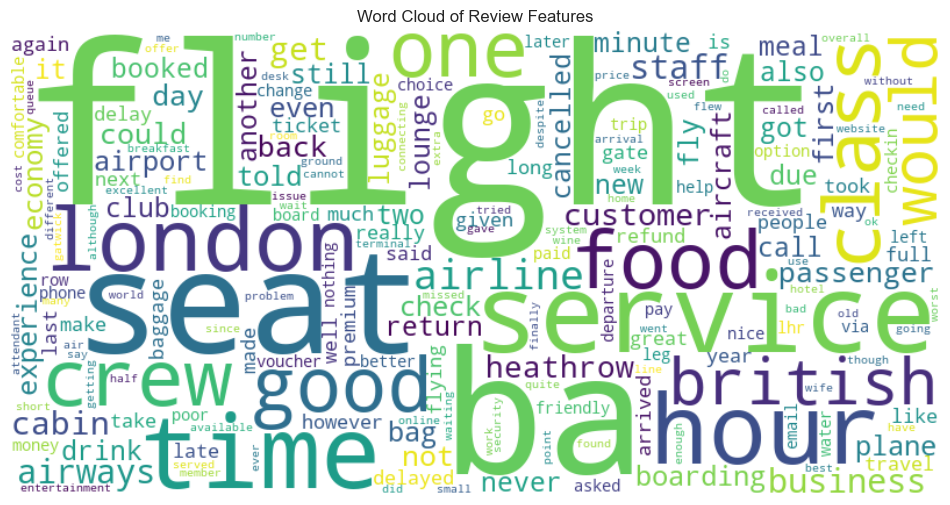

In [28]:
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
from sklearn.feature_extraction.text import CountVectorizer

# Assuming 'reviews' is the column in your DataFrame containing the reviews
documents = df1['lemmatized_reviews']

# Create a CountVectorizer instance
vectorizer = CountVectorizer()

# Fit and transform the documents into a document-term matrix
X = vectorizer.fit_transform(documents)

# Convert the document-term matrix to a DataFrame for better handling
dtm_df = pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

# Sum the counts of each feature across all documents
feature_counts = dtm_df.sum()

# Sort the features by their counts in descending order
sorted_features = feature_counts.sort_values(ascending=False)

# Display top N features
top_n = 10
top_features = sorted_features.head(top_n)

# Create a bar graph
plt.figure(figsize=(10, 6))
top_features.plot(kind='bar', color='skyblue')
plt.title(f'Top {top_n} Mentioned Review Features')
plt.xlabel('Review Features')
plt.ylabel('Count')
plt.xticks(rotation=45, ha='right')
plt.show()

# Create a word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(sorted_features)
plt.figure(figsize=(12, 8))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Review Features')
plt.show()